# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
       
        if len(list(app_train[col].unique())) <= 2:
             print(col)
            # 就做 Label Encoder, 以加入相關係數檢查
             app_train[col] = le.fit_transform(app_train[col]) 
            
print(app_train.shape)
app_train.head()
le.fit_transform(app_train['CODE_GENDER']) 

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
(307511, 122)


array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
cor_target = app_train.corr()['TARGET']
target_sort = cor_target.sort_values()

In [7]:
min5_target = target_sort.head(5)
min5_target

EXT_SOURCE_3         -0.178919
EXT_SOURCE_2         -0.160472
EXT_SOURCE_1         -0.155317
DAYS_BIRTH           -0.078239
DAYS_EMPLOYED_ANOM   -0.045987
Name: TARGET, dtype: float64

In [8]:
max5_target = target_sort.tail(6)
max5_target

DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

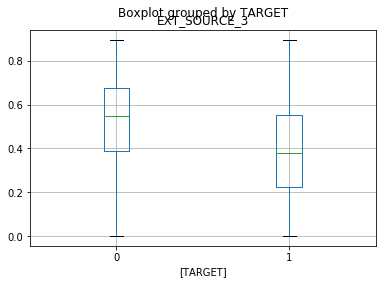

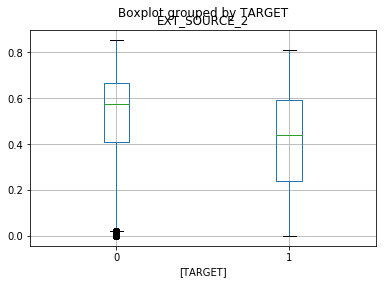

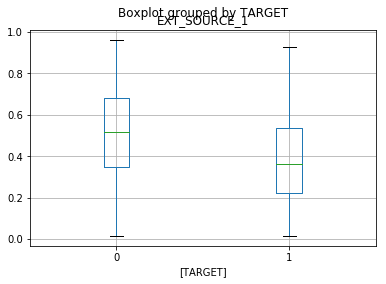

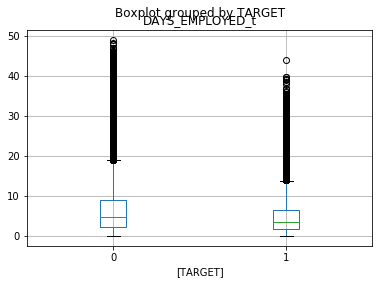

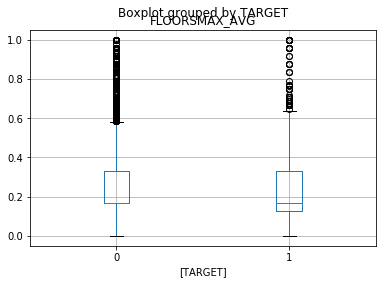

In [18]:
col = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG']
app_train['DAYS_EMPLOYED_t'] = app_train['DAYS_EMPLOYED']/-365

app_train.boxplot(column=['EXT_SOURCE_3'], by = ['TARGET'])
app_train.boxplot(column=['EXT_SOURCE_2'], by = ['TARGET'])
app_train.boxplot(column=['EXT_SOURCE_1'], by = ['TARGET'])
app_train.boxplot(column=['DAYS_EMPLOYED_t'], by = ['TARGET'])
app_train.boxplot(column=['FLOORSMAX_AVG'], by = ['TARGET'])


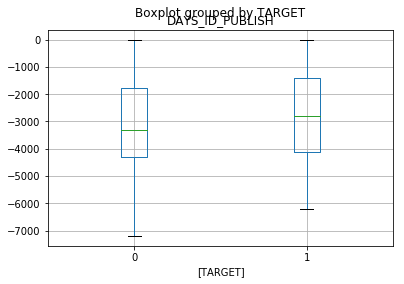

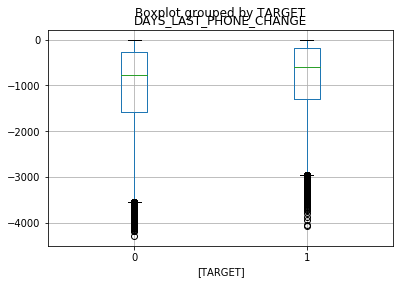

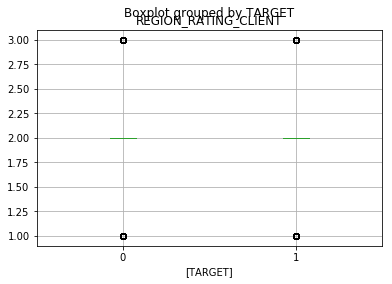

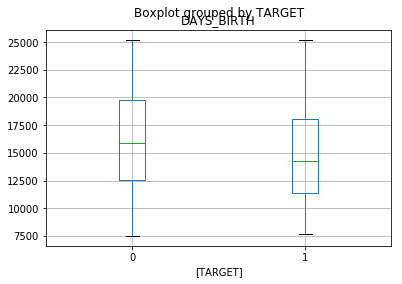

In [46]:
app_train.boxplot(column=['DAYS_ID_PUBLISH'], by = ['TARGET'])
app_train.boxplot(column=['DAYS_LAST_PHONE_CHANGE'], by = ['TARGET'])
app_train.boxplot(column=['REGION_RATING_CLIENT'], by = ['TARGET'])##
app_train.boxplot(column=['DAYS_BIRTH'], by = ['TARGET'])



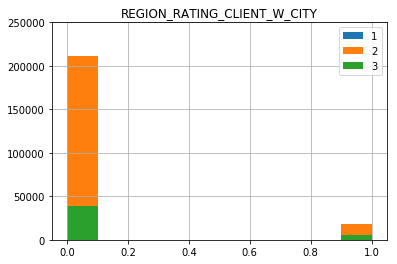

In [49]:
s = app_train.groupby(['REGION_RATING_CLIENT_W_CITY'])['TARGET']
s.hist()
plt.ylim(0, 250000)
plt.legend(s.unique().index)
plt.title('REGION_RATING_CLIENT_W_CITY')
plt.show()

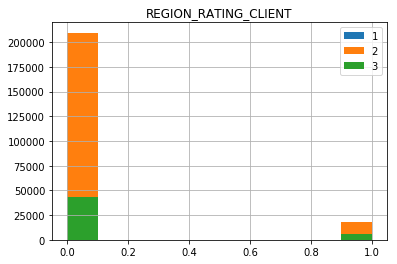

In [66]:
s = app_train.groupby(['REGION_RATING_CLIENT'])['TARGET']
s.hist()
plt.ylim(0, 220000)
plt.legend(s.unique().index)
plt.title('REGION_RATING_CLIENT')
plt.show()

In [59]:
data = app_train.loc[app_train['REGION_RATING_CLIENT']==1][['TARGET', 'REGION_RATING_CLIENT']]
sum(data['TARGET']==0)

30645